In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


2022-10-08 22:08:15.391861: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-08 22:08:15.392186: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-2.9930232 ]
 [ 0.26370507]
 [-0.54788744]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.03957641]
 [0.17116201]
 [0.0328474 ]], shape=(3, 1), dtype=float32)


In [5]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

In [6]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.5720238],
       [-1.0869832],
       [ 0.8689407]], dtype=float32)>


In [7]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [8]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [9]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [10]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

In [11]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [12]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [13]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [14]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [15]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [16]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

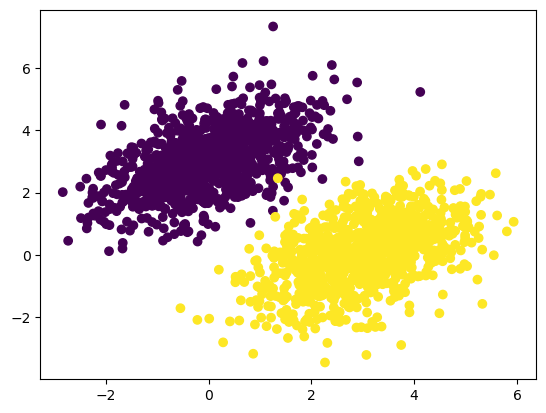

In [17]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [18]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [19]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [20]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [21]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [23]:
for step in range(50):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.0275
Loss at step 1: 0.0274
Loss at step 2: 0.0273
Loss at step 3: 0.0272
Loss at step 4: 0.0271
Loss at step 5: 0.0270
Loss at step 6: 0.0269
Loss at step 7: 0.0268
Loss at step 8: 0.0267
Loss at step 9: 0.0267
Loss at step 10: 0.0266
Loss at step 11: 0.0266
Loss at step 12: 0.0265
Loss at step 13: 0.0265
Loss at step 14: 0.0264
Loss at step 15: 0.0264
Loss at step 16: 0.0264
Loss at step 17: 0.0263
Loss at step 18: 0.0263
Loss at step 19: 0.0263
Loss at step 20: 0.0262
Loss at step 21: 0.0262
Loss at step 22: 0.0262
Loss at step 23: 0.0262
Loss at step 24: 0.0262
Loss at step 25: 0.0262
Loss at step 26: 0.0261
Loss at step 27: 0.0261
Loss at step 28: 0.0261
Loss at step 29: 0.0261
Loss at step 30: 0.0261
Loss at step 31: 0.0261
Loss at step 32: 0.0261
Loss at step 33: 0.0261
Loss at step 34: 0.0261
Loss at step 35: 0.0261
Loss at step 36: 0.0261
Loss at step 37: 0.0261
Loss at step 38: 0.0261
Loss at step 39: 0.0260
Loss at step 40: 0.0260
Loss at step 41: 0.0260
Lo

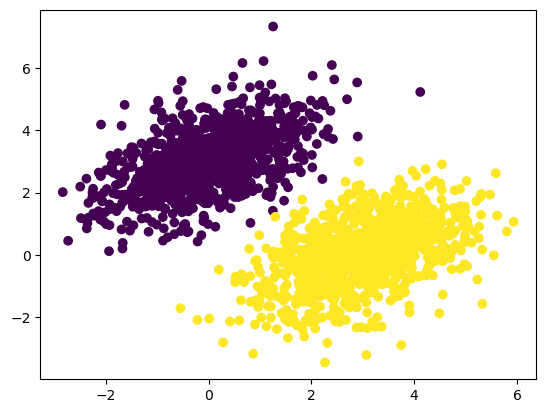

In [24]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

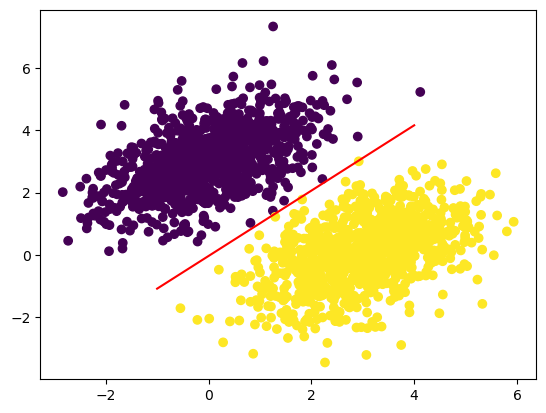

In [25]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

In [26]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [27]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [28]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [29]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [30]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

In [31]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [32]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [33]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

2022-10-08 22:15:12.623038: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/5
16/16 [==============================] - 0s 678us/step - loss: 6.3337 - binary_accuracy: 0.9523
Epoch 2/5
16/16 [==============================] - 0s 1ms/step - loss: 6.1012 - binary_accuracy: 0.9442
Epoch 3/5
16/16 [==============================] - 0s 960us/step - loss: 5.8390 - binary_accuracy: 0.9441
Epoch 4/5
16/16 [==============================] - 0s 1ms/step - loss: 5.5686 - binary_accuracy: 0.9521
Epoch 5/5
16/16 [==============================] - 0s 982us/step - loss: 5.2473 - binary_accuracy: 0.9552


In [34]:
history.history

{'loss': [6.190517425537109,
  5.899564743041992,
  5.652900695800781,
  5.4167985916137695,
  5.185413360595703],
 'binary_accuracy': [0.9520000219345093,
  0.9495000243186951,
  0.9490000009536743,
  0.9490000009536743,
  0.9474999904632568]}

In [35]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 7ms/step - loss: 0.4383 - binary_accuracy: 0.9135 - val_loss: 0.0555 - val_binary_accuracy: 0.9817
Epoch 2/5
88/88 [==============================] - 0s 977us/step - loss: 0.0763 - binary_accuracy: 0.9583 - val_loss: 0.1495 - val_binary_accuracy: 0.9350
Epoch 3/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0741 - binary_accuracy: 0.9538 - val_loss: 0.0334 - val_binary_accuracy: 0.9950
Epoch 4/5
88/88 [==============================] - 0s 941us/step - loss: 0.0735 - binary_accuracy: 0.9618 - val_loss: 0.2885 - val_binary_accuracy: 0.6317
Epoch 5/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0809 - binary_accuracy: 0.9396 - val_loss: 0.0475 - val_binary_accuracy: 0.9917


In [36]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[ 0.01741648]
 [ 0.1689387 ]
 [-0.14582056]
 [-0.15791678]
 [ 1.1213729 ]
 [ 0.9407685 ]
 [ 0.10425675]
 [-0.1499505 ]
 [ 0.25854838]
 [ 0.1761035 ]]
